In [ ]:
# Miminizzazione del sistema  V_n(𝐱) · σ(𝐱) = rhs(𝐱) dove  𝐱 = (a, b) ∈ [0,1]x[0,1] con un metodo di ottimizzazione classico

from funzioni import solve_ab,Matrici_aerodinamiche,read_airfoil_file
import numpy as np
import sympy as sp
from skopt import gp_minimize
from skopt.space import Real
import matplotlib.pyplot as plt

In [ ]:
# Definizione della funzione di costo 

# funzione di costo : C(x) = 1 - |<sigma_0 /||sigma_0||, sigma(x) /||sigma(x)||>|^2
def cost(sigma_0, x, rhs, vn_ext) :
    sigma_0 = sigma_0/ np.linalg.norm(sigma_0) 
    sigma = solve_ab(x[0], x[1], vn_ext, rhs)
    sigma = sigma/np.linalg.norm(sigma)
    prod_scal = sigma.T @ sigma_0 
    mod_quadro = abs(prod_scal)**2 
    val = 1 - mod_quadro
    cost_x = val[0]
    return cost_x

In [ ]:
# Dati iniziali del problema aerodinamico

data = read_airfoil_file("naca0012_07_sym.txt") # lettura del profilo alare
alpha_deg = 4
alpha_sym = sp.Float(np.deg2rad(alpha_deg)) # angolo simbolico ( in radianti per compatibilità con numpy )
vn_ext, rhs = Matrici_aerodinamiche(data, alpha_sym) # vn_ext e rhs sono rispettivamente una matrice simbolica 9x9 e un vettore di lunghezza 9 in funzione di 𝐱 = (a, b) ∈ [0,1]x[0,1]

In [ ]:
# Minimizzazione della funzione di costo 

# Parametri iniziali
sigma_0 = [0.7815136080484366, 0.8702848948594854, 1.333594725296618, 1.656720020972868, 0.5612358696279389, -0.2357639965490963, -0.7068146733682219, -1.059680396687932, 0.1033718030071634] # vettore target per la funzione di costo
cost_history = []

# Funzione ausiliaria per gli input di gp_minimize
def wrapper(xk):
    cost_xk = cost(sigma_0, xk, rhs, vn_ext)
    cost_history.append(cost_xk) 
    return cost_xk

result = gp_minimize(func = wrapper, dimensions = [Real(0.0001,1,name = 'x0' ),Real(0.0001,1,name = 'x1' )], n_calls = 100,n_initial_points = 10,acq_func = 'EI',random_state=42,verbose=True)
print(f"punto di minimo : {result.x}, minimo : {result.fun}:")

Iteration No: 1 started. Evaluating function at random point.
,valore [0.9015904]
[0.9015904]
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.2699
Function value obtained: 0.9016
Current minimum: 0.9016
Iteration No: 2 started. Evaluating function at random point.
,valore [0.8647078]
[0.8647078]
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.4681
Function value obtained: 0.8647
Current minimum: 0.8647
Iteration No: 3 started. Evaluating function at random point.
,valore [0.84734925]
[0.84734925]
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.4832
Function value obtained: 0.8473
Current minimum: 0.8473
Iteration No: 4 started. Evaluating function at random point.
,valore [0.81673325]
[0.81673325]
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.4502
Function value obtained: 0.8167
Current minimum: 0.8167
Iteration No: 5 started. Evaluating function at random point.
,valore [0.90900068]
[0.90900068]


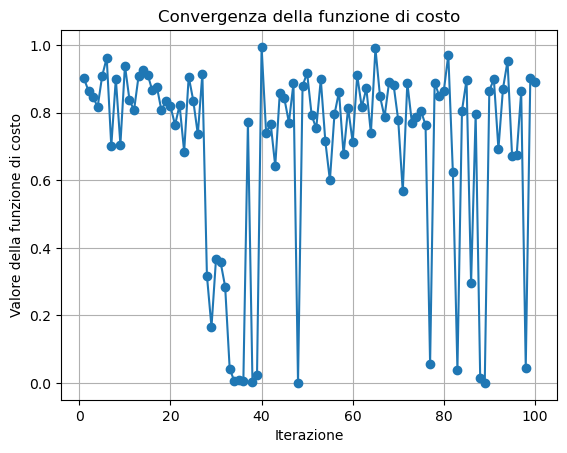

In [ ]:
# Plot della cost_history nel corso delle iterazioni

plt.plot(range(1, len(cost_history)+1), cost_history, marker='o')
plt.xlabel('Iterazione')
plt.ylabel('Valore della funzione di costo')
plt.title('Minimizzazione della funzione di costo')
plt.grid(True)
plt.show()